Contact : dhilip@iitrpr.ac.in <br>

    - Apoorv Kushwaha & Dr. T.J. Dhilip Kumar
        Quantum Dynamics Lab (410), IIT Ropar.

### 2D SF multipole expansion code for a rigid rotor-atom collision PES:
*Uses Legendre functions from scipy library of python*

In [151]:
import math
import numpy as np
import pandas as pd
from scipy.special import legendre
import matplotlib.pyplot as plt

In [164]:
df_inp = pd.read_csv('nccn_he_NN.dat',header=None,sep='\s+')  # import file

lm = 10  # lambda max 

In [179]:
df_inp.sort_values(by = [ 0,1], inplace=True, ascending = True)    # sort by R, theta
df_inp[2] = (df_inp[2]+188.31099452)*219474.63                     # convert to cm-1
df_inp.reset_index(inplace=True, drop = True)

In [180]:
nc=80
ngm = 91
px = np.zeros((ngm,lm))          # stores legendre polynomial
f = np.zeros(ngm)           # Ab initio energy 
R = np.zeros(nc)            # distance R
E = np.zeros(nc)            # multipole expanded potentials
df_out = pd.DataFrame()      # dataframe stores V lambda

In [181]:
V_nf= np.zeros((nc,lm)) 
V_n= np.zeros(lm)

In [182]:
for j2 in range (ngm):      # angle
    for j3 in range (lm):      # legendre
        pxc = legendre(j3*2)      # *2 for symmetric molecule (data upto 90 degree); *1 otherwise
        ang = math.radians(j2)
        px[j2,j3]= pxc(math.cos(ang))        

In [207]:
A_inv = np.linalg.pinv(px)

In [184]:
for i in range (nc):           # loop over all R   
    ct = i*ngm
    f = df_inp[2][ct:ct+ngm]   # sorted by R, theta (extracting V for one R at a time)
    V_n1 = A_inv.dot(f)
    V_nf[i,:] = V_n1
a12 = np.arange(lm)
df_Vnf = pd.DataFrame(V_nf, columns = a12*2)
df_Vnf[8:]

,0,2,4,6,8,10,12,14,16,18
8,115.539543,342.524242,-80.938275,-106.033024,55.663254,28.630983,-29.155228,-3.611405,12.545462,-3.968235
9,99.968662,340.178775,-34.845508,-127.012496,31.356385,46.607467,-19.747456,-17.139471,10.911133,2.221939
10,86.251427,330.597515,10.682912,-131.881227,0.829947,52.739092,-2.669887,-23.508545,2.541887,7.635786
11,73.645232,314.583982,53.191476,-121.363063,-28.616832,45.749514,14.508104,-19.869027,-6.457244,7.879561
12,61.598400,292.508024,90.205681,-97.543559,-50.461861,28.459762,24.728554,-9.139178,-10.345103,3.144817
...,...,...,...,...,...,...,...,...,...,...
75,-0.104415,-0.094254,0.047882,0.027246,-0.052571,0.006553,-0.008869,0.000408,-0.009008,-0.002300
76,-0.095716,-0.087697,0.047793,0.025707,-0.051645,0.007774,-0.008873,0.000734,-0.008755,-0.001870
77,-0.087646,-0.081795,0.047584,0.024216,-0.050710,0.008925,-0.008910,0.001048,-0.008522,-0.001471
78,-0.080143,-0.076492,0.047270,0.022775,-0.049768,0.010007,-0.008974,0.001350,-0.008307,-0.001102


In [185]:
min(df_Vnf[0])

-14.741555103189992

In [186]:
#df_Vnf = df_Vnf[8:][:]

In [190]:
x_dummy = np.arange(2.5,10.5,0.1)
len(x_dummy)

80

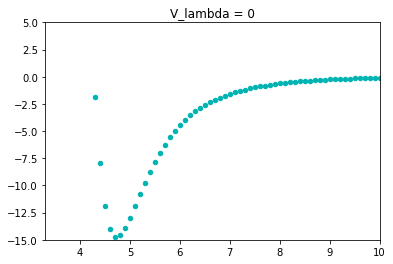

In [205]:
#Spline100
for i in range(0,lm):
    y_dummy = df_Vnf[i*2]
    # Plot the noisy exponential data
    plt.scatter(x_dummy, y_dummy,s=20, color='#00b3b3', label='Data')
    plt.title("V_lambda = %d" %(i*2))
    plt.ylim(-15, 5)
    plt.xlim(3.3, 10)
    plt.show()

In [192]:
# saving 2 datasets 1 from 2.5 and other from 3.3
# add data points to check for wobbes/kinks
x_22=np.arange(2,2.5,0.1)
x_3=np.append(x_22,x_dummy)
x_2=np.array([12.5,12.6,12.7,13,15,20,50])
x_3=np.append(x_3,x_2)

In [201]:
from scipy.optimize import curve_fit
a,b,c,d,e,f,rmsx = np.zeros(20),np.zeros(20),np.zeros(20),np.zeros(20),np.zeros(20),np.zeros(20),np.zeros(20)
def exp_fit(x, a,b,c):
    return  a*np.exp(-1*x)+b*np.exp(-2*x)+c*np.exp(-3*x)#+ \
            #d*np.exp(-4*x)#+e*np.exp(-5*x)+f*np.exp(-6*x)

[a b c] coefficients:  [-1.41323744e+03 -2.22414157e+05  2.20871268e+07]


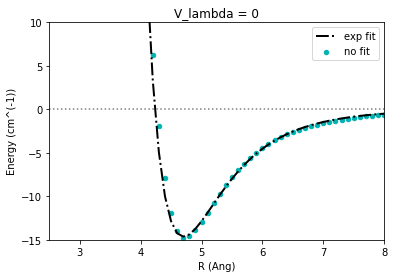

Double exponential RMSE =  0.1051876230731427


In [214]:

for i in range(0,lm):
    j=int(i)
    y_dummy = df_Vnf[j*2]
    parsx, covx = curve_fit(f=exp_fit, xdata=x_dummy[21:], ydata=y_dummy[21:], p0=[0,0,1000])
    a[j],b[j],c[j] = parsx
    print("[a b c] coefficients: ", parsx)
    # Plot the fit data as an overlay on the scatter data
    plt.scatter(x_dummy, y_dummy,s=20, color='#00b3b3',label = 'no fit')
    plt.plot(x_3, exp_fit(x_3, *parsx), linestyle='-.', linewidth=2, color='black', label = 'exp fit')
    plt.legend(loc="upper right")
    plt.ylabel("Energy (cm^(-1))")
    plt.xlabel("R (Ang)")
    plt.axhline(y=0, color='grey', linestyle=':')
    plt.title("V_lambda = %d" %(i))
    plt.ylim(-15, 10)
    plt.xlim(2.5, 8)
    plt.show()
    print('Double exponential RMSE = ',np.sqrt(np.average(np.power((exp_fit(x_dummy[21:], *parsx) 
                                                                    - y_dummy[21:]),2))))
    rmsx[j]=np.sqrt(np.average(np.power((exp_fit(x_dummy[21:], *parsx) - y_dummy[21:]),2)))

In [203]:
#spline100 data
# save output for each V lambdas as required by molscat!
print('LAMBDA =  0,2,4,6,8,10,12,14,16,18,')
print('NTERM  = ', '3,'*10)
print('NPOWER = ', '0,'*30)
print('A      = ')
for j in range (10):
    print(a[j],',',b[j],',',c[j],',')
print('E      =', '-1,-2,-3,'*10)

LAMBDA =  0,2,4,6,8,10,12,14,16,18,
NTERM  =  3,3,3,3,3,3,3,3,3,3,
NPOWER =  0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
A      = 
-1413.237443463985 , -222414.15738139366 , 22087126.801772237 ,
-772.9602042436222 , -746417.466001136 , 87916558.94835067 ,
292.54070783699405 , -567230.5614788638 , 78494622.54605423 ,
346.1778867221785 , -274471.587915636 , 42894645.869891606 ,
53.66582516314621 , -78302.9747205213 , 17307126.364579003 ,
39.285672447787704 , -81230.970617757 , 12506176.826437986 ,
74.62982853735666 , -74719.73121364153 , 11588398.231028805 ,
68.38901257848761 , -70836.96537961216 , 10446338.721376535 ,
55.07445438122233 , -57284.14783962402 , 9466338.087172123 ,
78.5279501753533 , -88799.68584386319 , 13827663.341585573 ,
E      = -1,-2,-3,-1,-2,-3,-1,-2,-3,-1,-2,-3,-1,-2,-3,-1,-2,-3,-1,-2,-3,-1,-2,-3,-1,-2,-3,-1,-2,-3,
